## Proyecto Final
### Análisis Exploratorio de Datos
### Luis Fernando Izquierdo Berdugo


## Introducción

## Implementación
### Instalación e importación de las librerías necesarias

In [1]:
!pip3 install ydata-profiling pyclustertend seaborn numpy pandas matplotlib scikit-learn

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from ydata_profiling import ProfileReport
from pyclustertend import vat, ivat, hopkins
from IPython.display import display, HTML
import warnings

# Configuración de visualización
pd.set_option('display.max_columns', None)
%matplotlib inline
warnings.filterwarnings('ignore')

### Carga del conjunto de datos

In [3]:
df = pd.read_csv('abalone_new.csv')
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Maturity_Level,Random_Index,Biological_Variation
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,aged,16,1.07198
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,mature,27,-0.25318
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,mature,72,-1.32416
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,mature,30,-1.04046
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,mature,89,-0.51718
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,M,0.625,0.515,0.170,1.3310,0.5725,0.3005,0.3610,9,mature,71,0.55554
4591,F,0.605,0.470,0.155,0.9740,0.3930,0.2240,0.3345,9,mature,25,-0.57318
4592,I,0.275,0.195,0.065,0.1060,0.0540,0.0200,0.0280,6,mature,46,0.07108
4593,I,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,4,young,62,1.37963


### Análisis exploratorio del dataset
#### Información general del dataset

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4595 non-null   object 
 1   Length                4177 non-null   float64
 2   Diameter              4595 non-null   float64
 3   Height                4177 non-null   float64
 4   Whole                 4177 non-null   float64
 5   Shucked               4595 non-null   float64
 6   Viscera               4595 non-null   float64
 7   Shell                 4595 non-null   float64
 8   Rings                 4595 non-null   int64  
 9   Maturity_Level        4595 non-null   object 
 10  Random_Index          4595 non-null   int64  
 11  Biological_Variation  4595 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 430.9+ KB


(4595, 12)

#### Estadísticas descriptivas para columnas numéricas

In [5]:
#Se hace un describe solamente para las columnas numéricas
df.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Random_Index,Biological_Variation
count,4177.000000,4595.000000,4177.000000,4177.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000
mean,0.522819,0.407657,0.139251,0.825430,0.358485,0.180565,0.238544,9.928836,49.670947,0.007672
std,0.120885,0.099393,0.042064,0.490611,0.220490,0.109504,0.138831,3.236160,28.573175,1.004244
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000,-3.718530
25%,0.450000,0.350000,0.115000,0.437000,0.187000,0.093500,0.130000,8.000000,25.000000,-0.665730
50%,0.545000,0.425000,0.140000,0.800000,0.335500,0.170000,0.233500,9.000000,49.000000,0.013340
75%,0.615000,0.480000,0.165000,1.150000,0.500750,0.253000,0.328500,11.000000,75.000000,0.691110
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,99.000000,3.389880


#### Verificar valores nulos

In [6]:
df.isnull().sum()

Sex                       0
Length                  418
Diameter                  0
Height                  418
Whole                   418
Shucked                   0
Viscera                   0
Shell                     0
Rings                     0
Maturity_Level            0
Random_Index              0
Biological_Variation      0
dtype: int64

#### Verificar duplicados

In [7]:
df.duplicated().sum()

np.int64(418)

#### Distribución de las variables categóricas Maturity_Level y Sex

In [8]:
df['Maturity_Level'].value_counts()

Maturity_Level
mature    2930
aged      1583
young       82
Name: count, dtype: int64

In [9]:
df['Sex'].value_counts()

Sex
M    1685
I    1476
F    1434
Name: count, dtype: int64

#### Matriz de correlación (solo columnas numéricas)

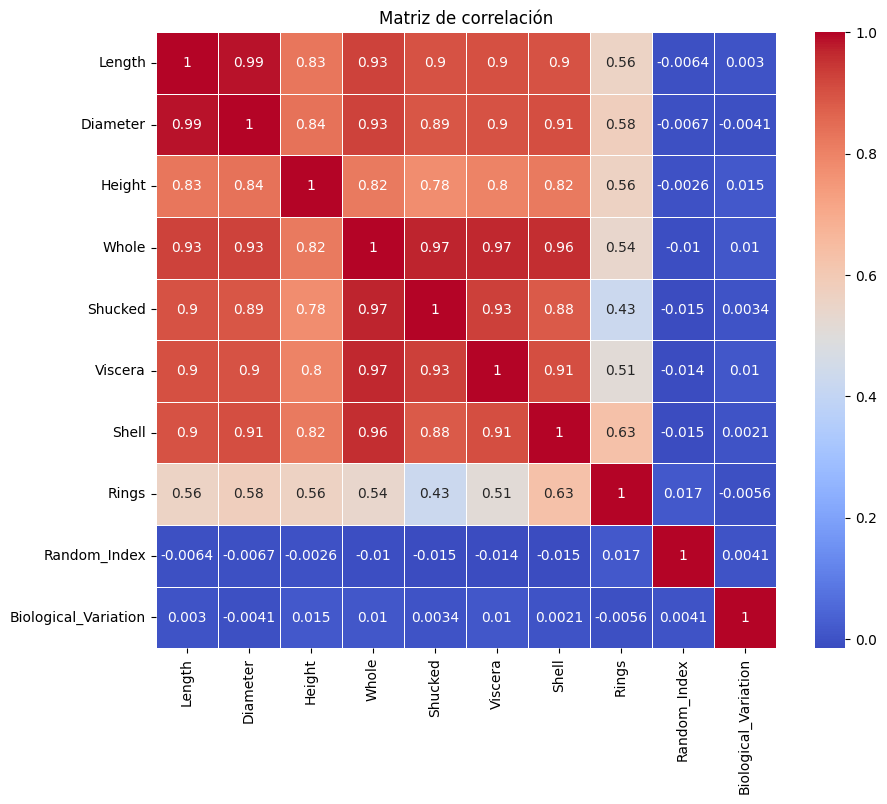

In [10]:
correlation = df.corr(numeric_only=True)
# Visualización de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

### Limpieza de Dataset
#### Detección y manejo de valores faltantes
Primero se guardaran lo tipos de datos originales de las columnas con valores faltantes, estas se identificaron previamente al buscar los valores nulos.

In [11]:
original_dtypes = df[['Length', 'Height', 'Whole']].dtypes
original_dtypes


Length    float64
Height    float64
Whole     float64
dtype: object

Se imputan los valores faltantes con la media de cada columna

In [12]:
for col in ['Length', 'Height', 'Whole']:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)


Se convierte de nuevo al tipo original que se había guardado y se redondea a 5 decimales

In [13]:
for col in ['Length', 'Height', 'Whole']:
    df[col] = df[col].astype(original_dtypes[col])  # convertir al tipo original
    df[col] = df[col].round(5)                      # redondear


Verificamos que ya no haya valores faltantes en las columnas

In [14]:
df[['Length', 'Height', 'Whole']].isnull().sum()

Length    0
Height    0
Whole     0
dtype: int64

#### Eliminación de columnas con varianza = 0
Si una columna tiene su varianza = 0, significa que tiene el mismo valor en todas sus filas, lo cual no aporta en nada al análisis.

Primero se crea un nuevo dataframe solo con las columnas numéricas

In [15]:
numeric_df = df.select_dtypes(include=['number'])

Se sacan las varianzas del nuevo dataframe

In [16]:
varianzas = numeric_df.var()
varianzas

Length                    0.013283
Diameter                  0.009879
Height                    0.001608
Whole                     0.218798
Shucked                   0.048616
Viscera                   0.011991
Shell                     0.019274
Rings                    10.472732
Random_Index            816.426311
Biological_Variation      1.008505
dtype: float64

Como se puede observar, no hay varianzas iguales a cero por lo cual no se eliminará ninguna columna.

#### Detección y remoción de outliers

Un outlier es un valor que se encuentra muy alejado del resto de los datos, esto puede ser por un error de captura o un caso muy extremo.

Para detectar los outliers, se utilizará el rango intecuartílico (IQR), este mide la dispersión del 50% central de los datos.

IQR = Tercer Cuartil - Primer Cuartil

Ya con esto se generan los límites inferior o superior.

Límite inferior = Q1 - 1.5 * IQR\
Límite superior = Q3 + 1.5 * IQR

Siendo cualquier valor por fuera de estos límites un outlier.

In [17]:
def detectar_outliers_iqr(df, columnas):
    outliers = pd.DataFrame()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ~df[col].between(lower, upper)  # True si es outlier
    return outliers

In [18]:
outliers_df = detectar_outliers_iqr(df, numeric_df)


Se buscan los outliers por fila y se guarda el valor en una columa `outliers_count`

In [19]:
df['outliers_count'] = outliers_df.sum(axis=1)

Se dejan únicamente las filas cuyo `outliers_count` es igual a cero y se borra esta columna.

In [20]:
df = df[df['outliers_count'] == 0].drop(columns='outliers_count')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094 entries, 0 to 4594
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4094 non-null   object 
 1   Length                4094 non-null   float64
 2   Diameter              4094 non-null   float64
 3   Height                4094 non-null   float64
 4   Whole                 4094 non-null   float64
 5   Shucked               4094 non-null   float64
 6   Viscera               4094 non-null   float64
 7   Shell                 4094 non-null   float64
 8   Rings                 4094 non-null   int64  
 9   Maturity_Level        4094 non-null   object 
 10  Random_Index          4094 non-null   int64  
 11  Biological_Variation  4094 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 415.8+ KB


#### Eliminación de valores duplicados

In [21]:
duplicados = df.duplicated().sum()
print(f"Valores duplicados: {duplicados}")

Valores duplicados: 372


In [22]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   3722 non-null   object 
 1   Length                3722 non-null   float64
 2   Diameter              3722 non-null   float64
 3   Height                3722 non-null   float64
 4   Whole                 3722 non-null   float64
 5   Shucked               3722 non-null   float64
 6   Viscera               3722 non-null   float64
 7   Shell                 3722 non-null   float64
 8   Rings                 3722 non-null   int64  
 9   Maturity_Level        3722 non-null   object 
 10  Random_Index          3722 non-null   int64  
 11  Biological_Variation  3722 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 378.0+ KB


#### Guardar el dataset procesado

In [23]:
df.to_csv('abalone_processed.csv', index=False)

### Procesamiento del Dataset

In [24]:
df_processed = pd.read_csv('abalone_processed.csv')

### Análisis Exploratorio del dataset abalone_processed.csv

#### Información general

In [25]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   3722 non-null   object 
 1   Length                3722 non-null   float64
 2   Diameter              3722 non-null   float64
 3   Height                3722 non-null   float64
 4   Whole                 3722 non-null   float64
 5   Shucked               3722 non-null   float64
 6   Viscera               3722 non-null   float64
 7   Shell                 3722 non-null   float64
 8   Rings                 3722 non-null   int64  
 9   Maturity_Level        3722 non-null   object 
 10  Random_Index          3722 non-null   int64  
 11  Biological_Variation  3722 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 349.1+ KB


#### Estadísticas descriptivas numéricas

In [26]:
df_processed.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Random_Index,Biological_Variation
count,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000
mean,0.522976,0.406699,0.137931,0.797856,0.349560,0.174986,0.227444,9.457281,49.827781,0.011491
std,0.106361,0.090174,0.033857,0.430278,0.201404,0.100503,0.121584,2.306046,28.660758,0.976336
min,0.245000,0.165000,0.050000,0.063500,0.024500,0.008000,0.015000,4.000000,1.000000,-2.694780
25%,0.455000,0.345000,0.115000,0.449500,0.186000,0.092625,0.130000,8.000000,25.000000,-0.659925
50%,0.530000,0.420000,0.139625,0.808000,0.328500,0.165750,0.221500,9.000000,49.000000,0.013165
75%,0.605000,0.475000,0.160000,1.105750,0.493000,0.244500,0.315000,11.000000,75.000000,0.691475
max,0.760000,0.600000,0.240000,2.087000,0.960000,0.492000,0.625000,15.000000,99.000000,2.710400


#### Verificar valores nulos

In [27]:
df_processed.isnull().sum()

Sex                     0
Length                  0
Diameter                0
Height                  0
Whole                   0
Shucked                 0
Viscera                 0
Shell                   0
Rings                   0
Maturity_Level          0
Random_Index            0
Biological_Variation    0
dtype: int64

#### Verificar duplicados

In [28]:
df_processed.duplicated().sum()

np.int64(0)

#### Distribución de variables categóricas

In [29]:
df_processed['Sex'].value_counts()

Sex
M    1345
I    1229
F    1148
Name: count, dtype: int64

In [30]:
df_processed['Maturity_Level'].value_counts()

Maturity_Level
mature    2584
aged      1117
young       21
Name: count, dtype: int64

#### Matriz de correlación

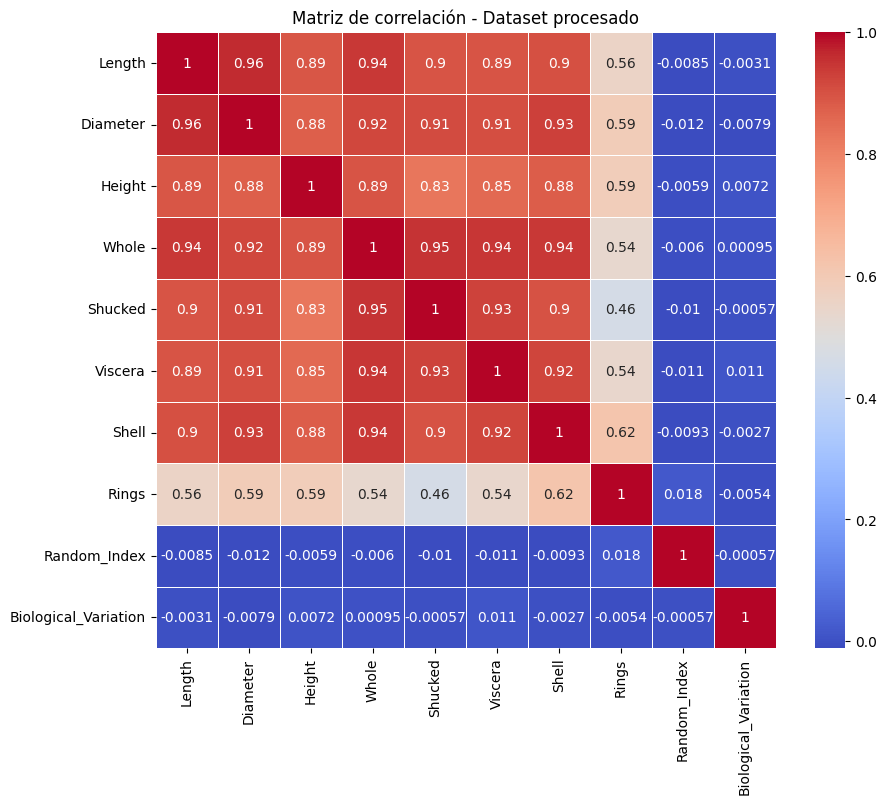

In [31]:
correlation_matrix = df_processed.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación - Dataset procesado")
plt.show()

### Análisis de Correlaciones

En el heatmap se puede observar que básicamente todas las variables tienen relación entre si, únicamente `Random_Index` y `Biological_Variation` tienen valores muy bajos con todas las demás variables, lo cual puede significar que no son relevantes y se procederá a eliminarlas.

In [32]:
df_processed.drop(columns=['Random_Index','Biological_Variation'], inplace=True)
df_processed.head()


,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Maturity_Level
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,aged
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,mature
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,mature


Y se genera de nuevo el heatmap

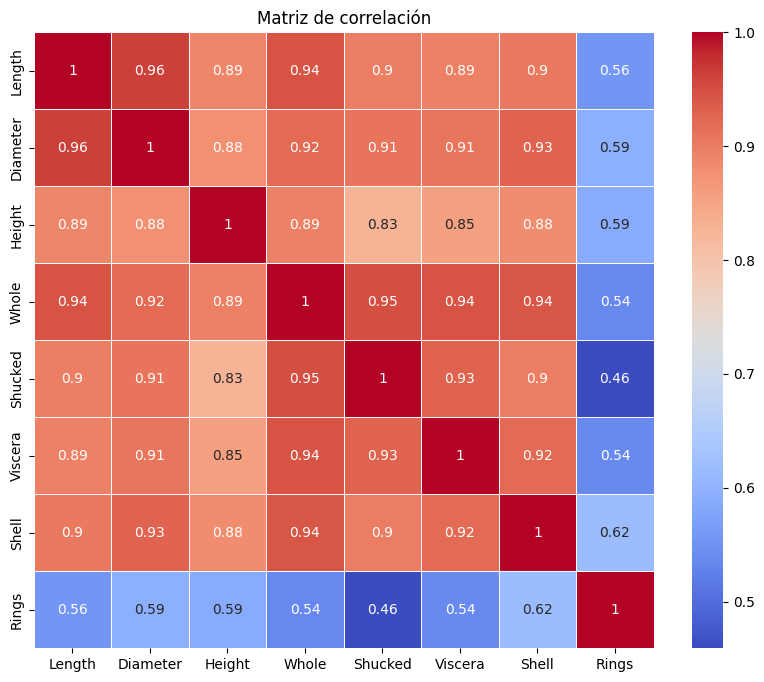

In [33]:
correlation_matrix = df_processed.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

### Análisis de tendencia de Clustering

Primero se seleccionarán solo las columnas numéricas y se normalizarán los datos

In [34]:
X = df_processed.select_dtypes(include=['number'])

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
hopkins_stat = hopkins(X_scaled, X_scaled.shape[0])
print("Hopkins Statistic:", hopkins_stat)

Hopkins Statistic: 0.10776365658948502


Con un valor estadístico de Hopkins tan bajo, se puede saber que el dataset no tiene una tendencia natural a formar clusters.

#### Evaluación con VAT e iVAT

<Figure size 600x600 with 0 Axes>

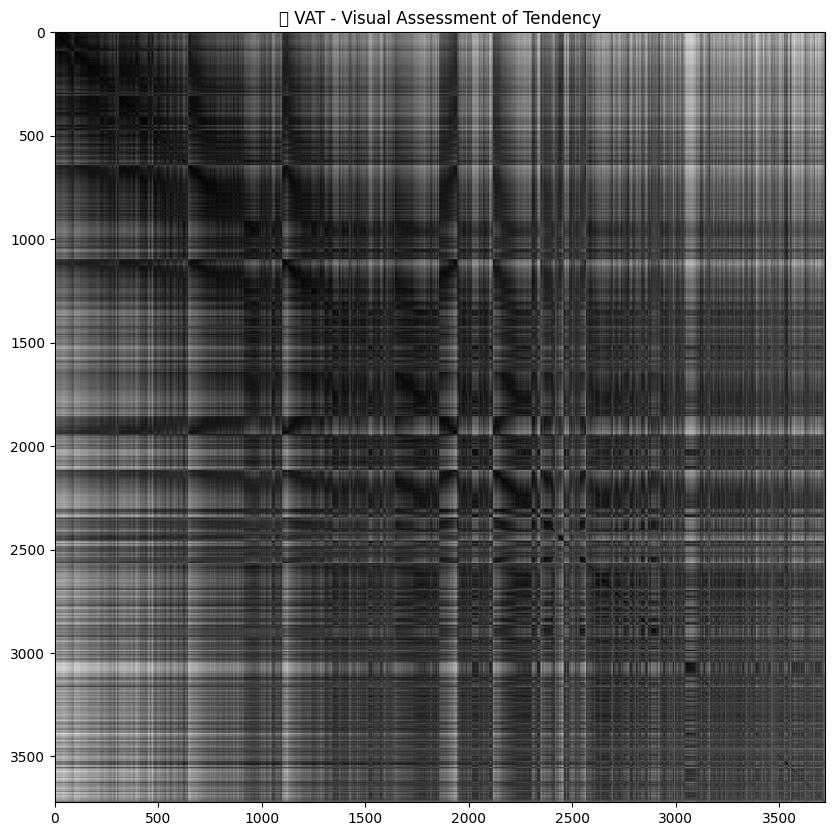

In [36]:
# VAT
plt.figure(figsize=(6, 6))
vat(X_scaled)
plt.title("👁 VAT - Visual Assessment of Tendency")
plt.show()

El VAT está muy difuso y sin bloques definidos, de igual manera, no se observan cuadrados bien marcados en la diagonal (lo cual indica agrupaciones naturales), por lo cual, hay una ausencia clara de clusters y los datos parecen distribuidos de manera continua y uniforme

<Figure size 600x600 with 0 Axes>

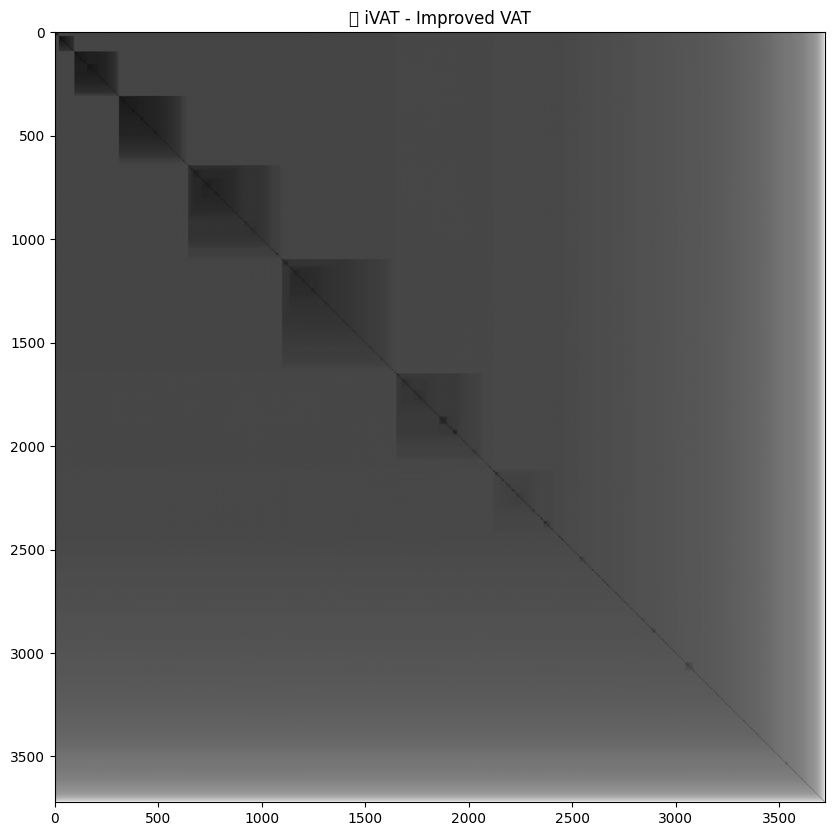

In [37]:
# iVAT
plt.figure(figsize=(6, 6))
ivat(X_scaled)
plt.title("👁 iVAT - Improved VAT")
plt.show()

En el iVAT se pueden observar bloques diagonales suaves, lo cual podría sugerir cierta agrupación, pero el resultado es demasiado leve.


### Análisis de reducción de bidimensionalidad (PCA)

#### Normalización de los datos

In [46]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#### Cálculo de varianza explicada

In [47]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

#### Gráfico de varianza explicada acumulada

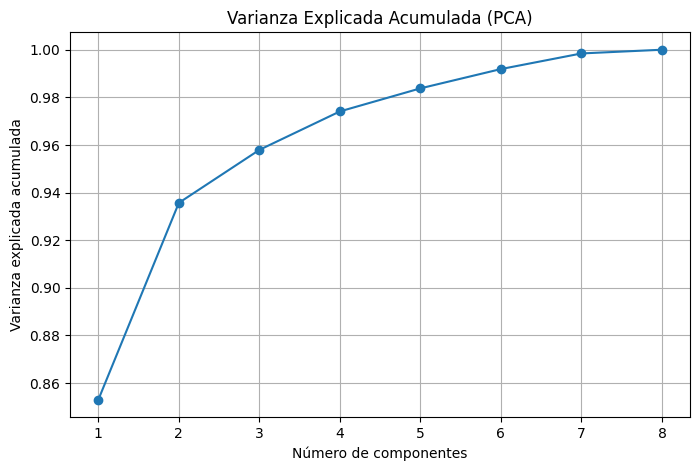

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza Explicada Acumulada (PCA)")
plt.grid(True)
plt.show()

#### Heatmap de los componentes

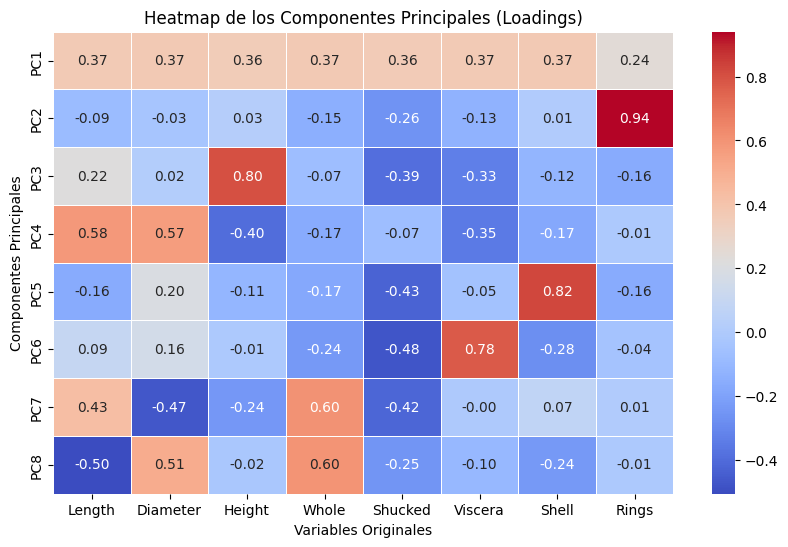

In [51]:
pca_components_df = pd.DataFrame(
    data=pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(len(X.columns))]
)

plt.figure(figsize=(10, 6))
sns.heatmap(pca_components_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de los Componentes Principales (Loadings)")
plt.xlabel("Variables Originales")
plt.ylabel("Componentes Principales")
plt.show()

#### Verificación de valores atípicos

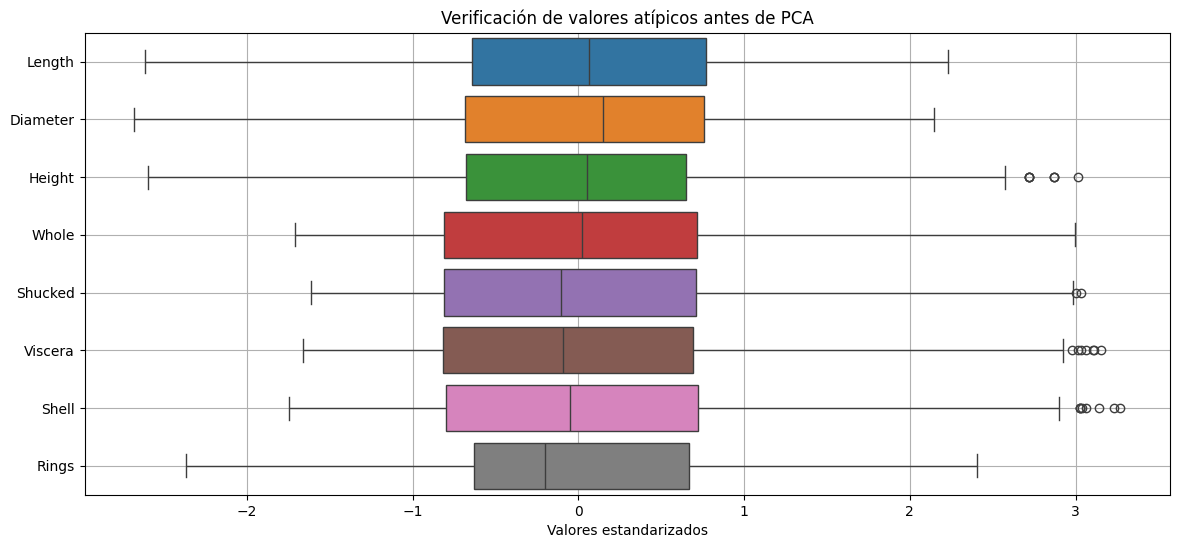

In [53]:
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

plt.figure(figsize=(14, 6))
sns.boxplot(data=X_scaled_df, orient="h")
plt.title("Verificación de valores atípicos antes de PCA")
plt.xlabel("Valores estandarizados")
plt.grid(True)
plt.show()

Se observa que `Height`, `Shucked`, `Viscera` y `Shell` presentan valores atípicos, sin embargo no parecen ser muchos casos y tampoco extremos, por lo cual se puede continuar sin tener que hacer un tratamiento (ya que se ejecutó previamente).

#### PCA

In [60]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

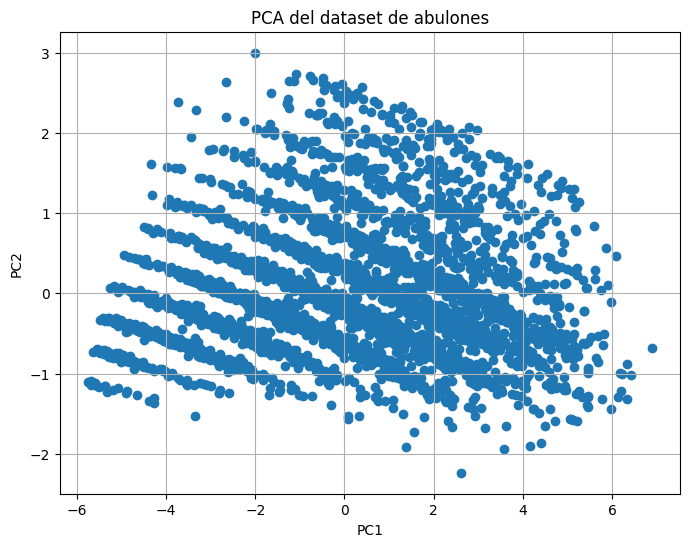

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA del dataset de abulones')
plt.grid(True)
plt.show()

#### KPCA

In [68]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_scaled)

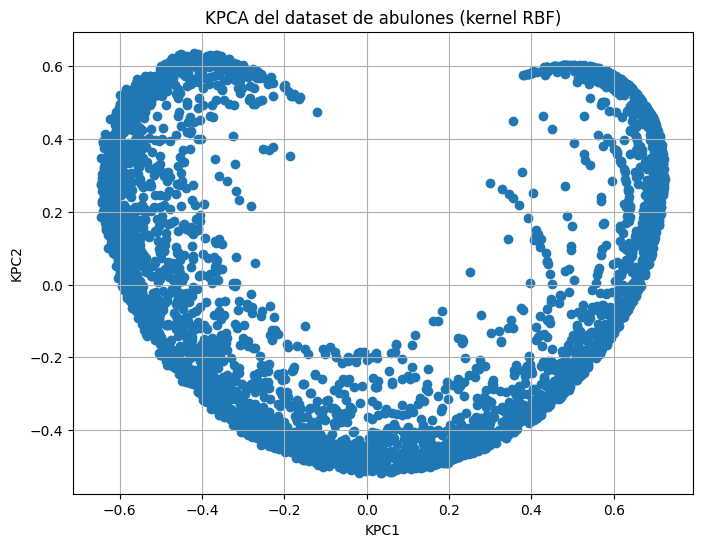

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.title("KPCA del dataset de abulones (kernel RBF)")
plt.grid(True)
plt.show()

#### KPCA con Kernel Polinomial

In [66]:
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

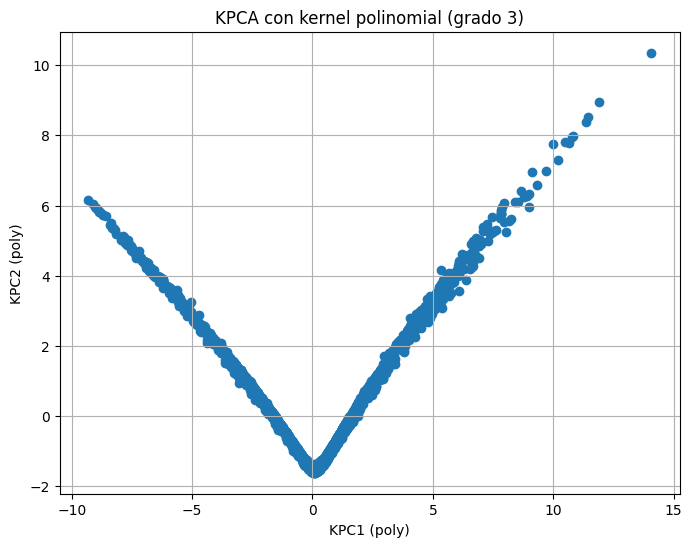

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1])
plt.xlabel("KPC1 (poly)")
plt.ylabel("KPC2 (poly)")
plt.title("KPCA con kernel polinomial (grado 3)")
plt.grid(True)
plt.show()

#### Espacio reconstruido después de KPCA

In [70]:
X_reconstructed = kpca.inverse_transform(X_kpca)

In [71]:
df_original = pd.DataFrame(X_scaled, columns=X.columns)
df_reconstructed = pd.DataFrame(X_reconstructed, columns=X.columns)

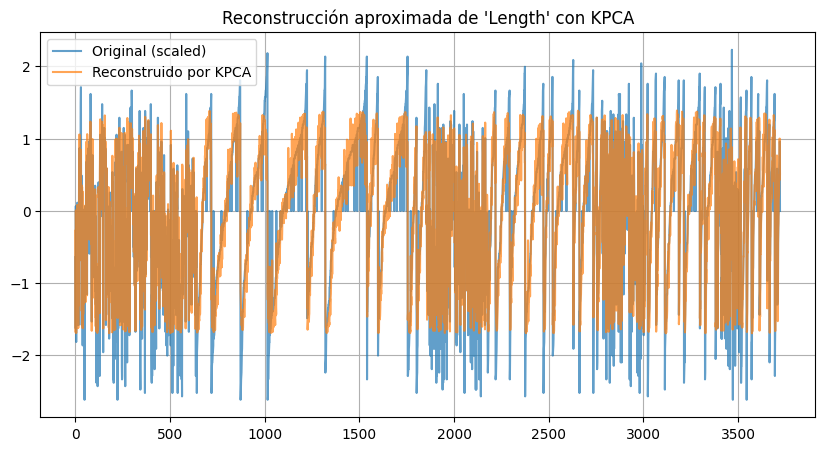

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(df_original['Length'], label='Original (scaled)', alpha=0.7)
plt.plot(df_reconstructed['Length'], label='Reconstruido por KPCA', alpha=0.7)
plt.title("Reconstrucción aproximada de 'Length' con KPCA")
plt.legend()
plt.grid(True)
plt.show()

#### Comparaciones

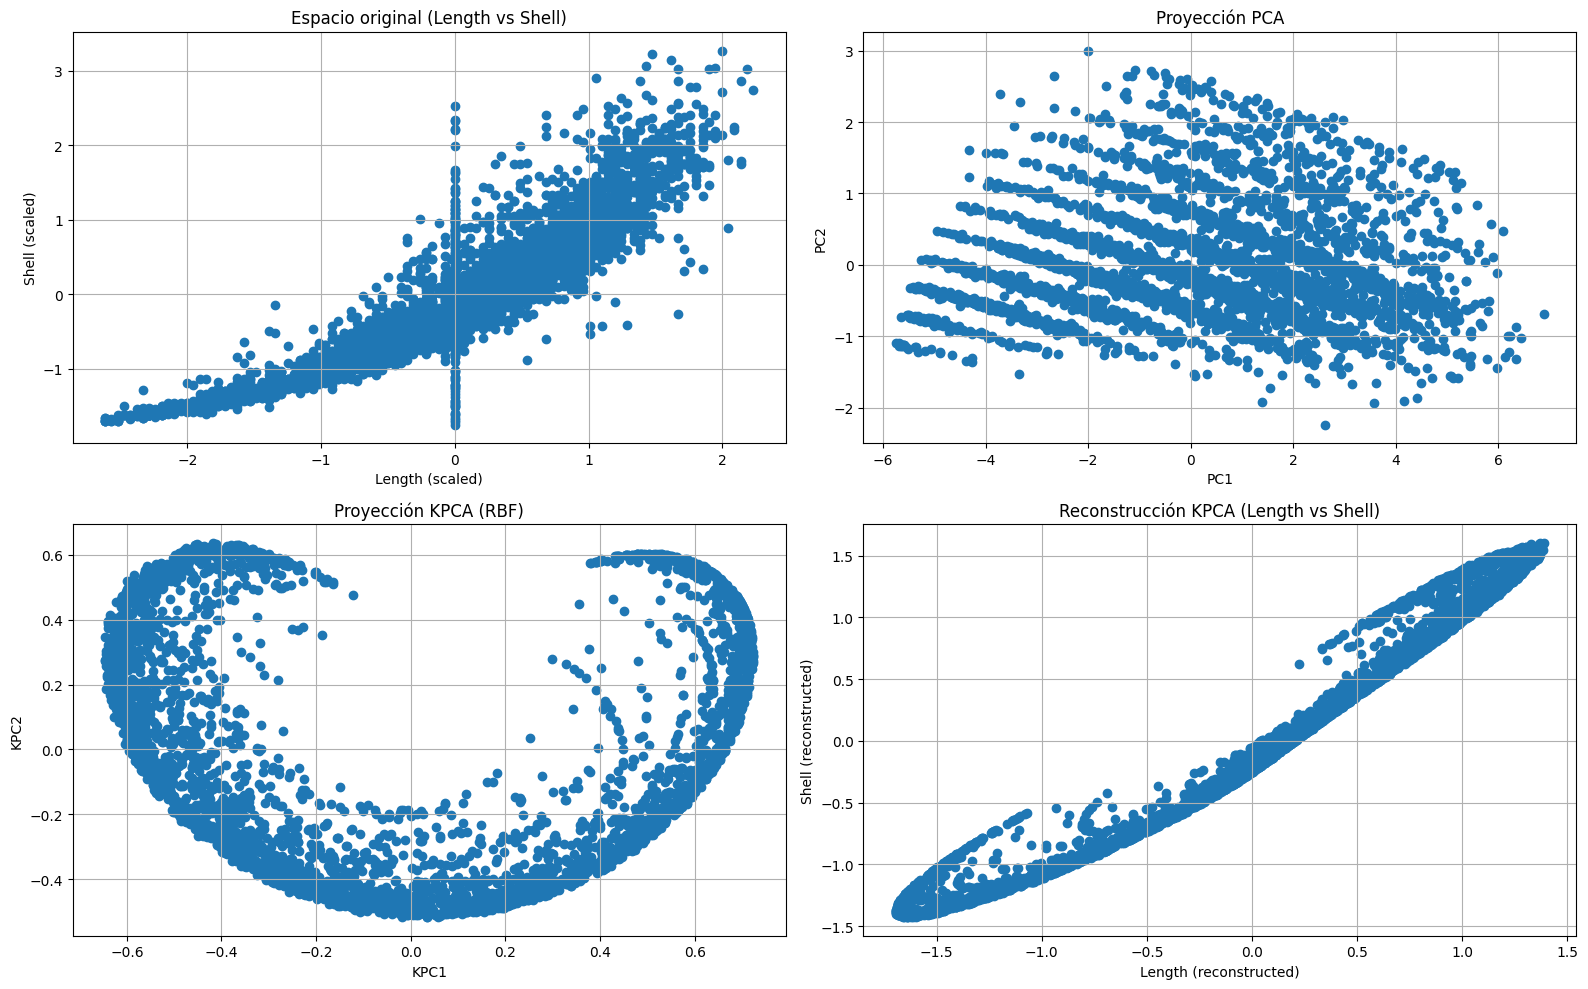

In [74]:
import matplotlib.pyplot as plt

# Crear DataFrames base
df_original = pd.DataFrame(X_scaled, columns=X.columns)
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
df_kpca = pd.DataFrame(X_kpca, columns=["KPC1", "KPC2"])
df_reconstructed = pd.DataFrame(X_reconstructed, columns=X.columns)

# Gráfico comparativo
plt.figure(figsize=(16, 10))

# 1. Espacio original
plt.subplot(2, 2, 1)
plt.scatter(df_original["Length"], df_original["Shell"])
plt.title("Espacio original (Length vs Shell)")
plt.xlabel("Length (scaled)")
plt.ylabel("Shell (scaled)")
plt.grid(True)

# 2. Proyección PCA
plt.subplot(2, 2, 2)
plt.scatter(df_pca["PC1"], df_pca["PC2"])
plt.title("Proyección PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# 3. Proyección KPCA
plt.subplot(2, 2, 3)
plt.scatter(df_kpca["KPC1"], df_kpca["KPC2"])
plt.title("Proyección KPCA (RBF)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.grid(True)

# 4. Reconstrucción después de KPCA
plt.subplot(2, 2, 4)
plt.scatter(df_reconstructed["Length"], df_reconstructed["Shell"])
plt.title("Reconstrucción KPCA (Length vs Shell)")
plt.xlabel("Length (reconstructed)")
plt.ylabel("Shell (reconstructed)")
plt.grid(True)

plt.tight_layout()
plt.show()
